In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from cnn import CNN
from data_frame import DataReader

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
base_dir = '/Users/shuyangdu/Desktop/CS229/FinalProject/'

In [4]:
dr = DataReader(data_dir=os.path.join(base_dir, 'data/processed/'))

/Users/shuyangdu/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


train size 137809
val size 7254
test size 145063


In [ ]:
nn.fit()

In [10]:
nn.restore()

restoring model parameters from /Users/shuyangdu/Desktop/CS229/FinalProject/checkpoints/model-3380


INFO:tensorflow:Restoring parameters from /Users/shuyangdu/Desktop/CS229/FinalProject/checkpoints/model-3380


In [11]:
nn.predict()

saving priors with shape (145063, 803) to /Users/shuyangdu/Desktop/CS229/FinalProject/predictions/priors.npy
saving labels with shape (145063, 64) to /Users/shuyangdu/Desktop/CS229/FinalProject/predictions/labels.npy
saving page_id with shape (145063,) to /Users/shuyangdu/Desktop/CS229/FinalProject/predictions/page_id.npy
saving preds with shape (145063, 64) to /Users/shuyangdu/Desktop/CS229/FinalProject/predictions/preds.npy


In [3]:
priors = np.load('/Users/shuyangdu/Desktop/CS229/FinalProject/predictions/priors.npy')
# labels = np.load('/Users/shuyangdu/Desktop/CS229/FinalProject/predictions/labels.npy')
labels = priors[:, -64:]
preds = np.load('/Users/shuyangdu/Desktop/CS229/FinalProject/predictions/preds.npy')

In [4]:
dates = np.load('/Users/shuyangdu/Desktop/CS229/FinalProject/data/processed/dates.npy')

In [5]:
preds.shape

(145063, 64)

In [10]:
labels.shape

(145063, 64)

In [24]:
def smape(y_true, y_pred):
    return np.mean(2.0 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

In [25]:
smape(labels, preds)

42.367276549339294

In [14]:
smape(labels, preds)

2.0

In [8]:
def plot_ts(idx):
    y_label = priors[idx, :]
    y_pred = np.zeros_like(y_label)
    y_pred[:-64] = np.nan
    y_pred[-64:] = preds[idx, :]
    return pd.DataFrame({
        'preds': y_pred,
        'labels': y_label
        },
        index=dates
    ).plot(figsize=(10, 6))

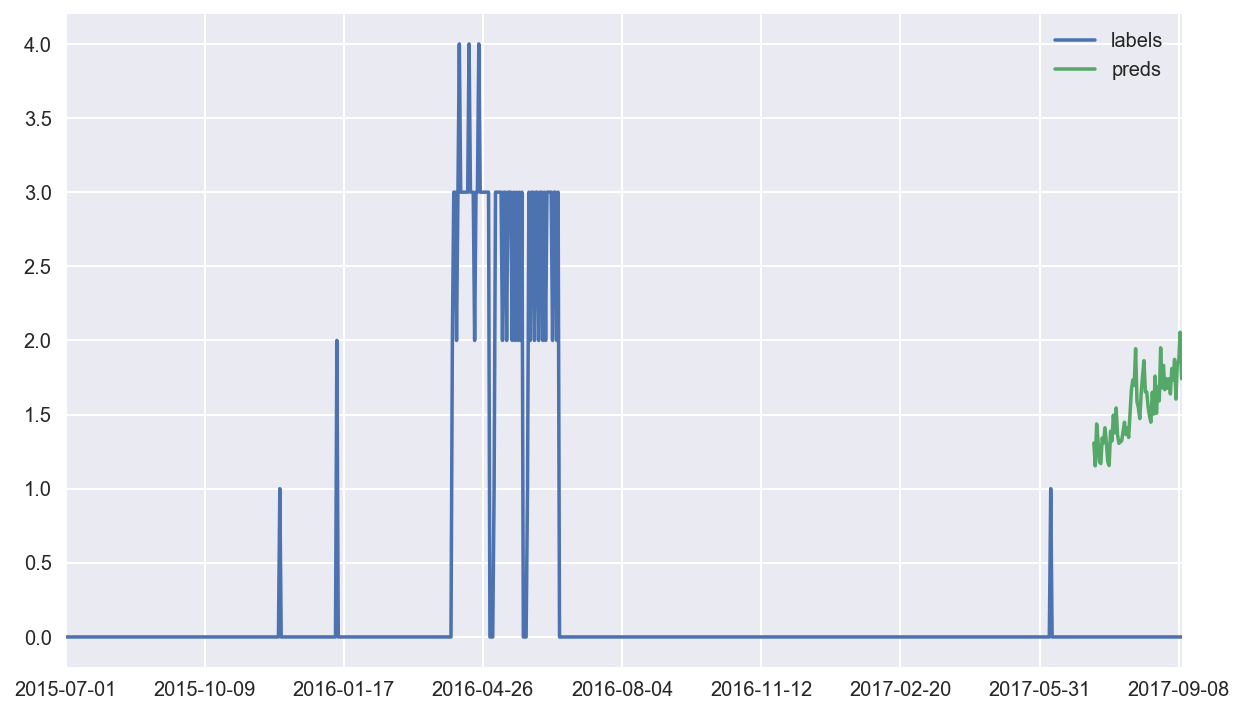

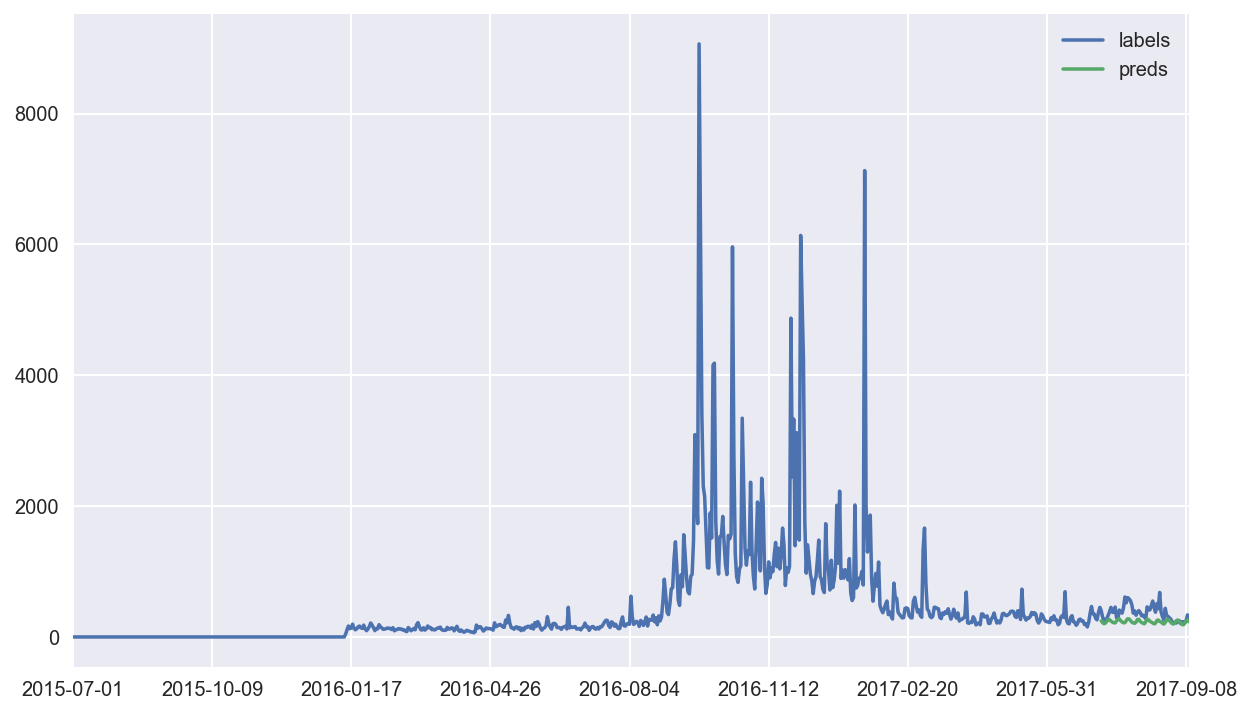

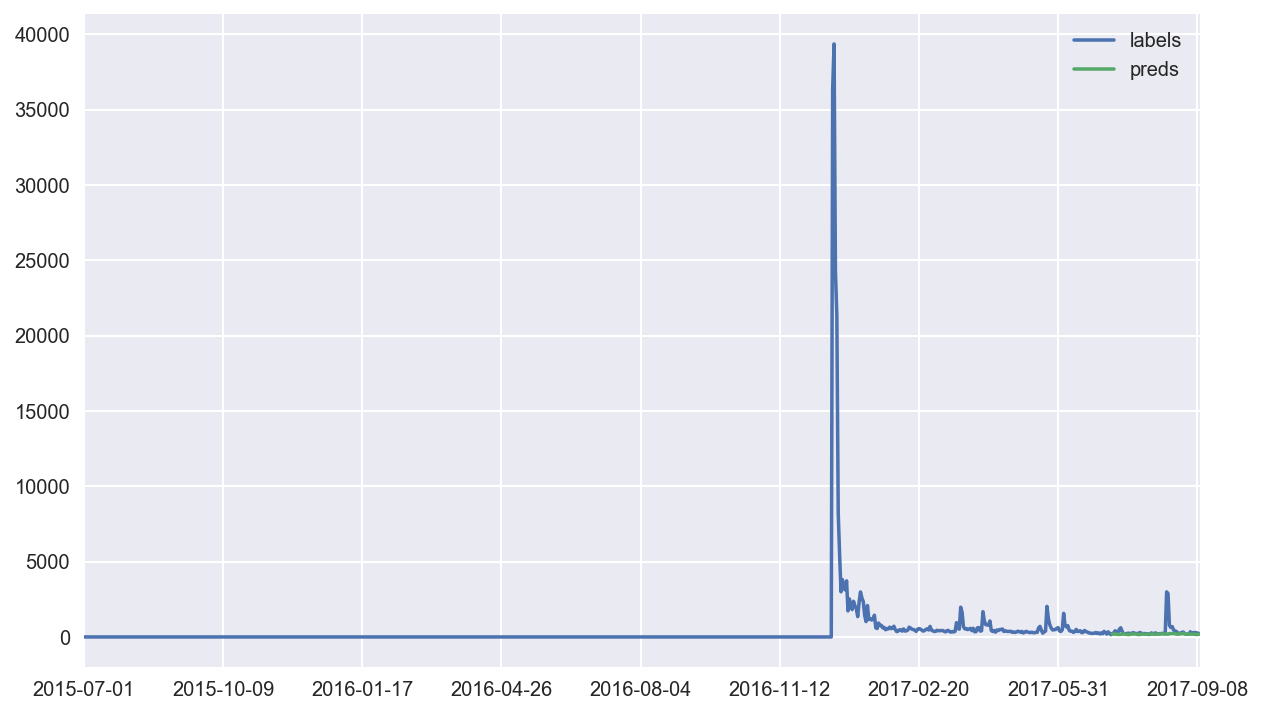

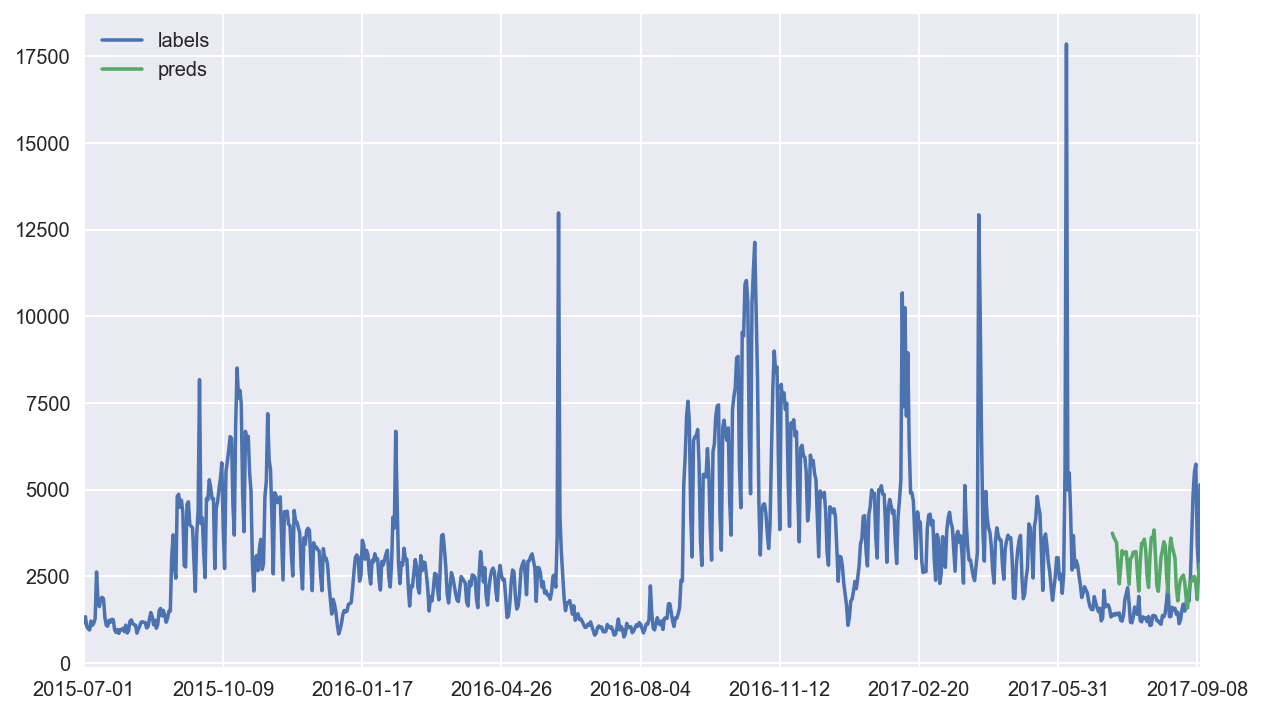

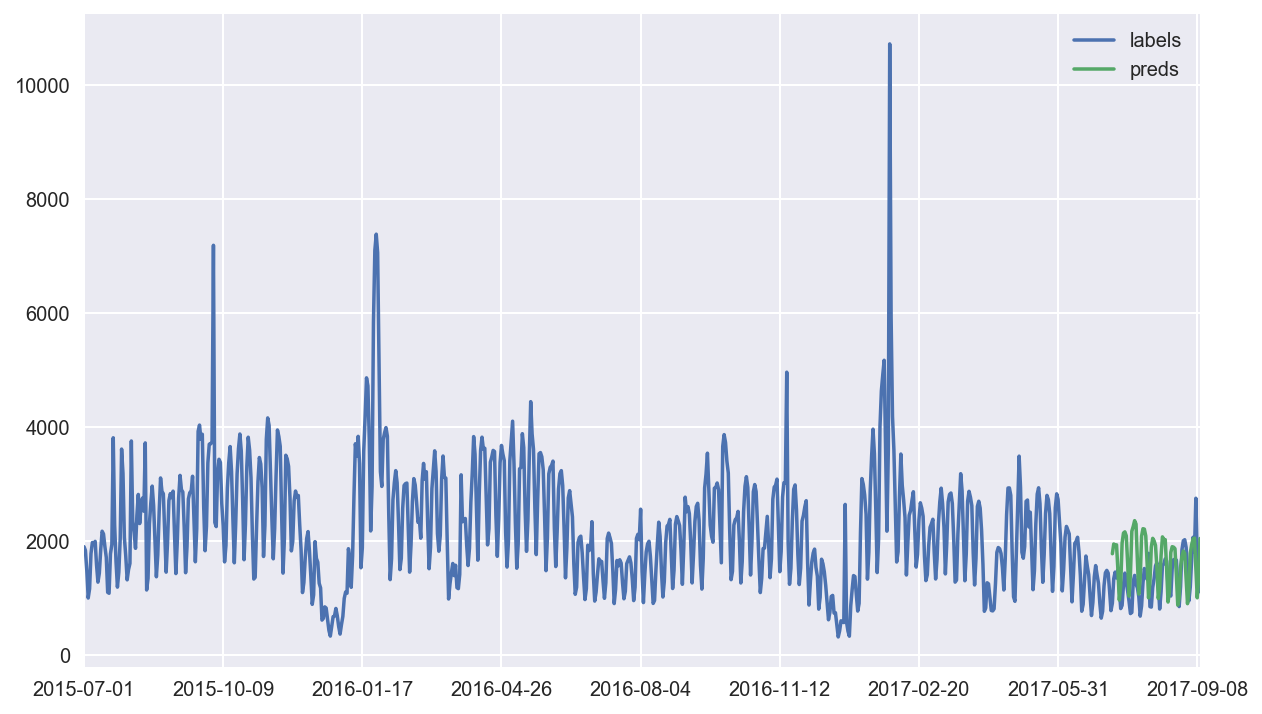

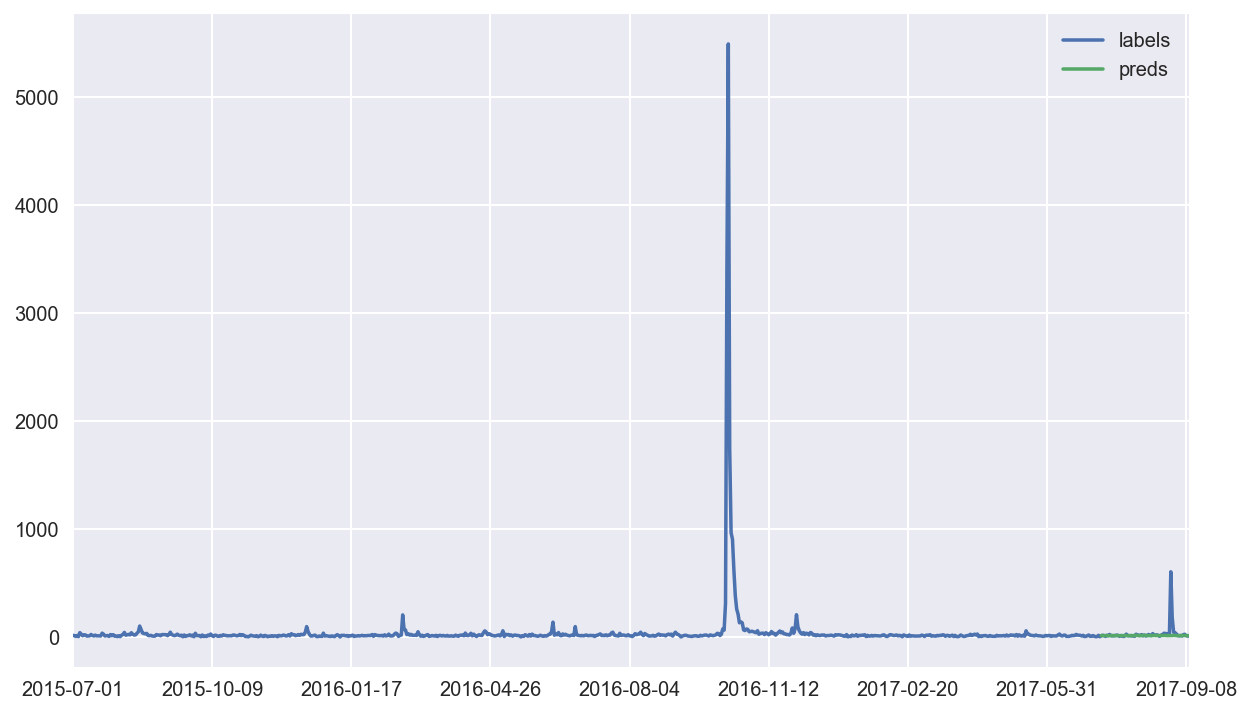

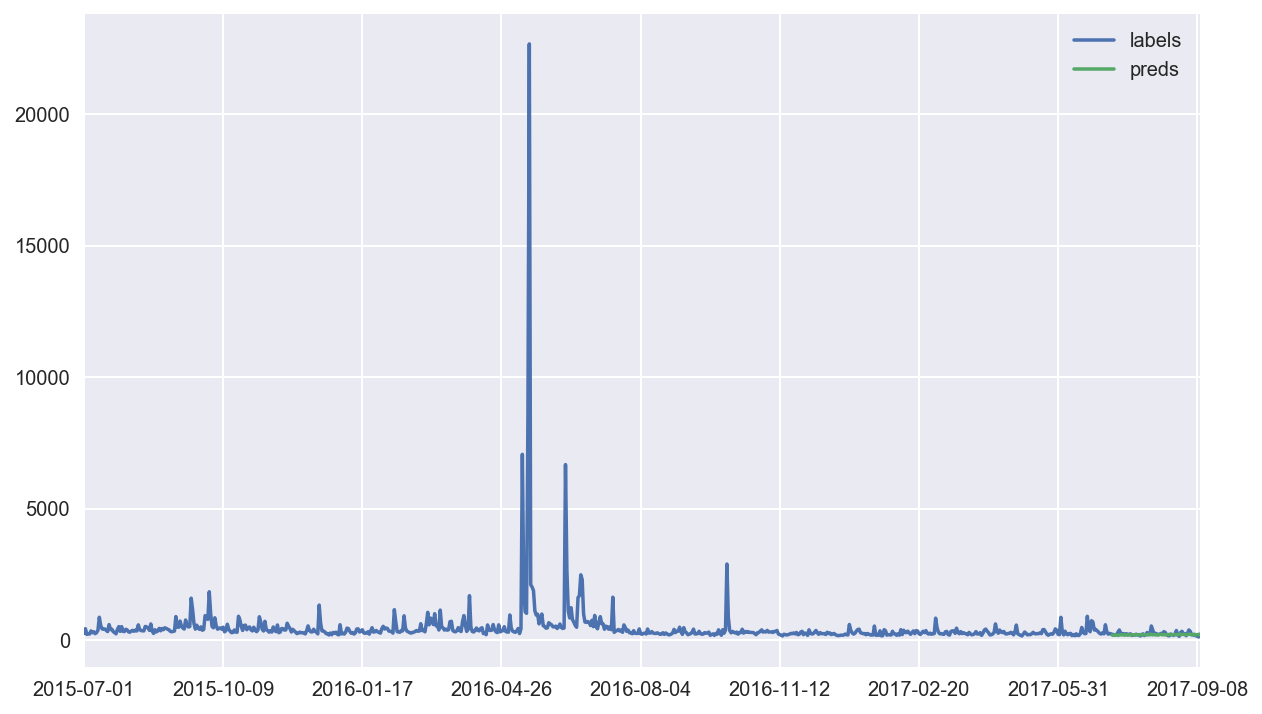

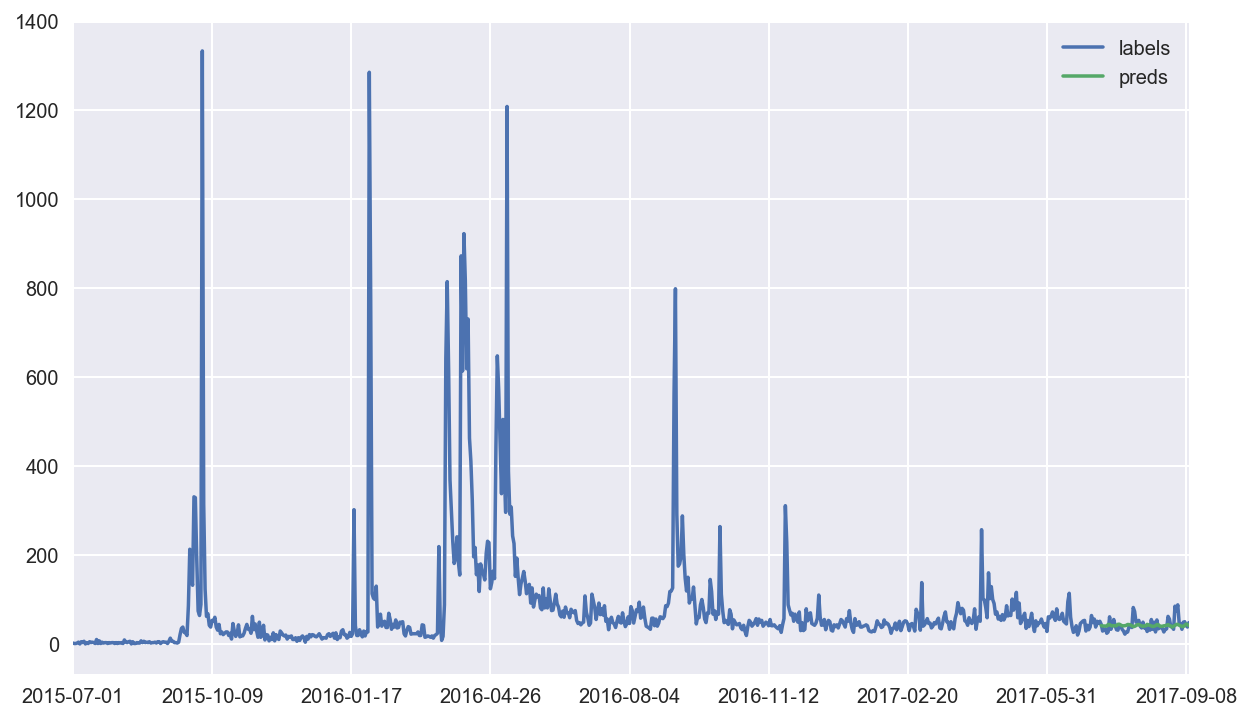

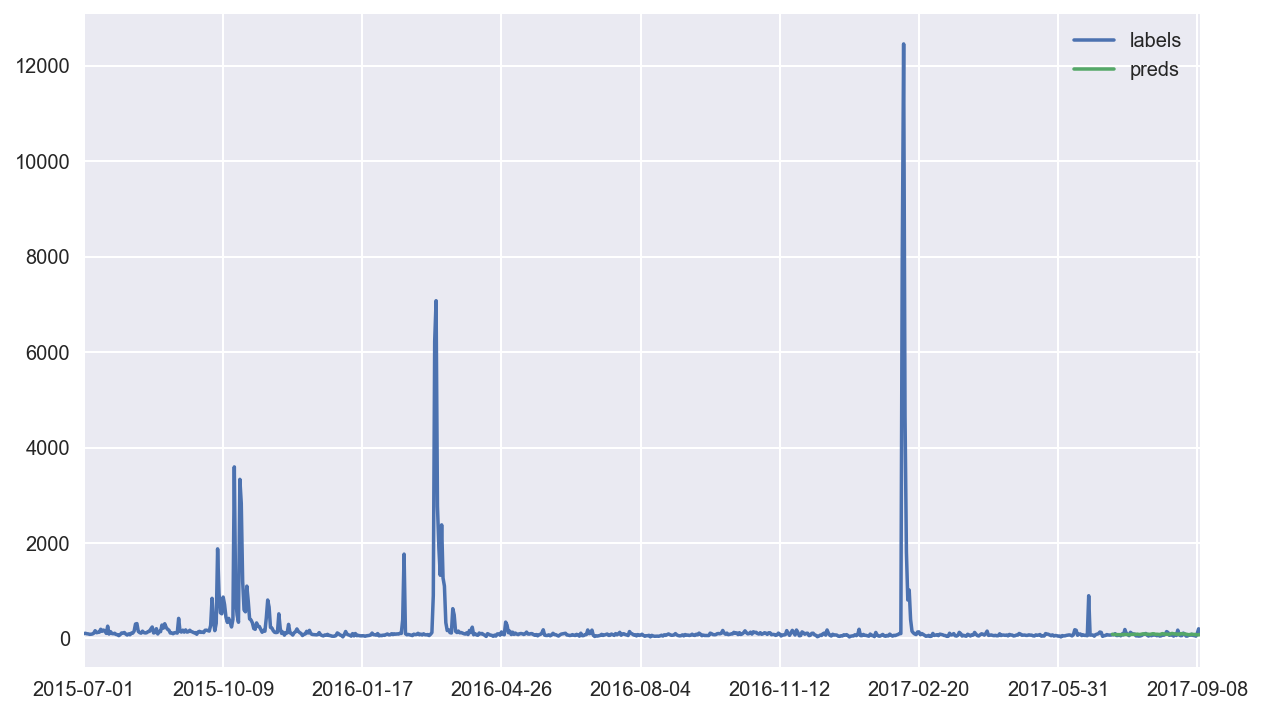

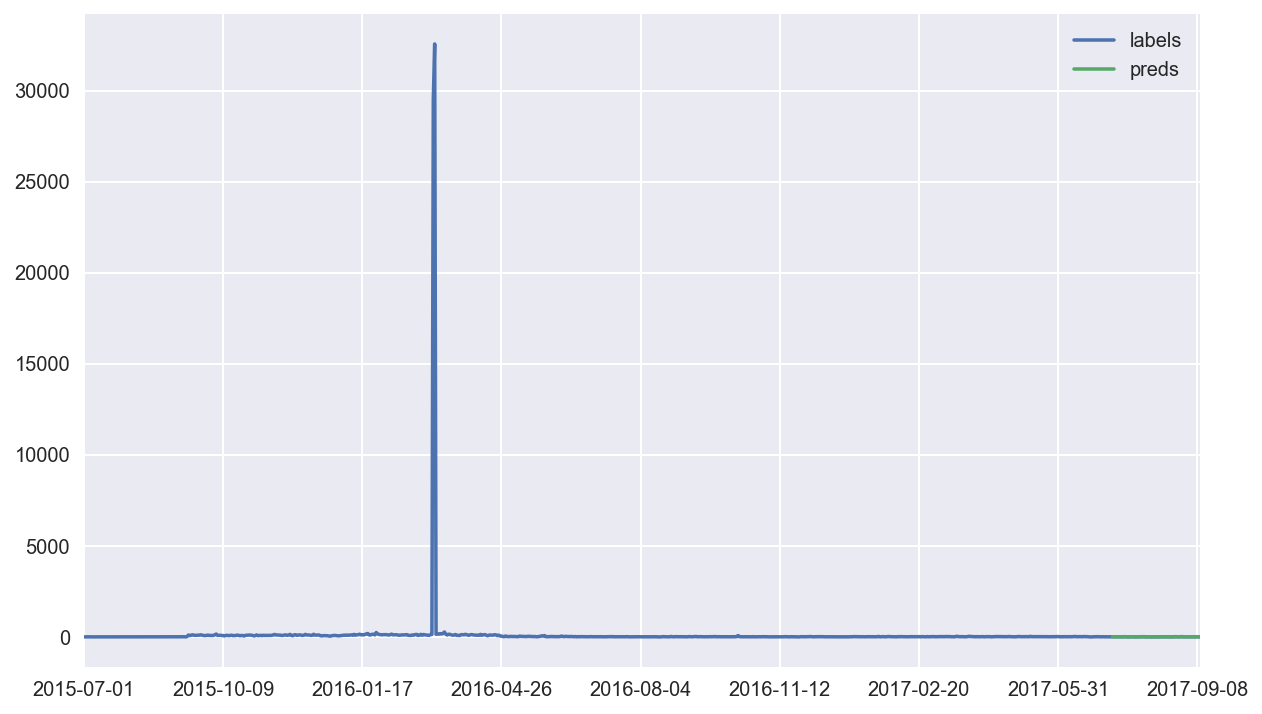

In [9]:
for idx in np.random.choice(range(preds.shape[0]), 10, replace=False):
    plot_ts(idx)

In [70]:
dates[-64]

u'2017-07-09'